<a href="https://colab.research.google.com/github/rakenputra/machine-learning/blob/main/UTS/(UTS)K_Mean_Clustering_Tokyo_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **UTS MACHINE LEARNING**

Raken Putra Athallah

Tk-44-02

1103204186

Dataset : Tokyo_Weatherdata

Model : K-Mean Clustering

Prompt :  beri kode untuk menghubungkan google colab dengan google drive

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


Prompt : beri kode untuk membaca dataset dan mengubah dataset sebagai dataframe


In [3]:
import pandas as pd

# Tentukan path file dataset di Google Drive
file_path = '/content/drive/MyDrive/Dataset/weather_tokyo_data.csv'

# Baca dataset menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari DataFrame
df.head()

,year,day,temperature,humidity,atmospheric pressure
0,2022,11/6,13.5,61.0,1019.3
1,2022,11/7,13.7,70.0,1018.9
2,2022,11/8,15.9,55.0,1016.1
3,2022,11/9,14.6,58.0,1022.2
4,2022,11/10,15.2,64.0,1020.1


**EDA**

EDA (Exploratory Data Analysis) merujuk pada serangkaian teknik statistik dan visualisasi yang digunakan untuk memahami struktur dataset, mengidentifikasi pola, mengeksplorasi hubungan antar variabel, dan membuat hipotesis awal tentang data sebelum melibatkan analisis statistik yang lebih lanjut. EDA bertujuan untuk mendapatkan pemahaman awal yang mendalam tentang data tanpa membuat asumsi sebelumnya.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  366 non-null    int64  
 1   day                   366 non-null    object 
 2   temperature           366 non-null    object 
 3   humidity              366 non-null    float64
 4   atmospheric pressure  366 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.4+ KB


Dari output diatas, atribut "year" dan "day" mungkin menjadi kandidat yang potensial untuk dihapus jika tidak memberikan informasi yang signifikan terkait dengan pola dalam suhu, kelembaban, dan tekanan atmosfer yang ingin Anda identifikasi dengan proses clustering.

Prompt : Berikan kode untuk menghapus atribut 'year' dan 'day'

In [5]:
# Menampilkan DataFrame sebelum penghapusan atribut
print("DataFrame sebelum penghapusan:")
print(df.head())

# Menghapus atribut 'Year' dan 'day'
df = df.drop(['year', 'day'], axis=1)

# Menampilkan DataFrame setelah penghapusan atribut
print("\nDataFrame setelah penghapusan:")
print(df.head())

DataFrame sebelum penghapusan:
   year    day temperature  humidity   atmospheric pressure
0  2022   11/6       13.5        61.0                1019.3
1  2022   11/7       13.7        70.0                1018.9
2  2022   11/8       15.9        55.0                1016.1
3  2022   11/9       14.6        58.0                1022.2
4  2022  11/10       15.2        64.0                1020.1

DataFrame setelah penghapusan:
  temperature  humidity   atmospheric pressure
0       13.5        61.0                1019.3
1       13.7        70.0                1018.9
2       15.9        55.0                1016.1
3       14.6        58.0                1022.2
4       15.2        64.0                1020.1


Output tersebut menunjukkan struktur dataset kita sebelum dan sesudah atribut 'Year' dan 'Day' dihapus

Akan tetapi jika kita melihat kembali struktur dataset yang kita miliki, atribut 'temperature' memiliki Dtype object yang memungkinkan menunjukkan data ini tidak memiliki nilai numerik. Yang dimaana tipe data yang biasanya digunakan untuk melakukan clustering adalah tipe data numerik. Oleh karena itu kita akan mengkonversikannya menjadi data numerik.

In [6]:
# Contoh: Mengubah kolom "temperature" ke tipe data numerik
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')

Jika proses konversi menghasilkan nilai yang hilang atau salah, pertimbangkan cara penanganan yang sesuai, seperti mengganti nilai-nilai yang hilang atau menghapus baris yang tidak dapat dikonversi.

In [7]:
# Contoh: Mengganti nilai-nilai yang hilang dengan rata-rata
df['temperature'].fillna(df['temperature'].mean(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           366 non-null    float64
 1   humidity              366 non-null    float64
 2   atmospheric pressure  366 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [9]:
# Menunjukkan jumlah nilai kosong (NaN) dalam setiap kolom
df.isnull().sum()

temperature             0
humidity                0
atmospheric pressure    0
dtype: int64

In [10]:
atribut = df.columns
print("Daftar Atribut:")
print(atribut)

Daftar Atribut:
Index(['temperature', 'humidity ', 'atmospheric pressure'], dtype='object')


Prompt : Berikan kode untuk melihat distribusi data

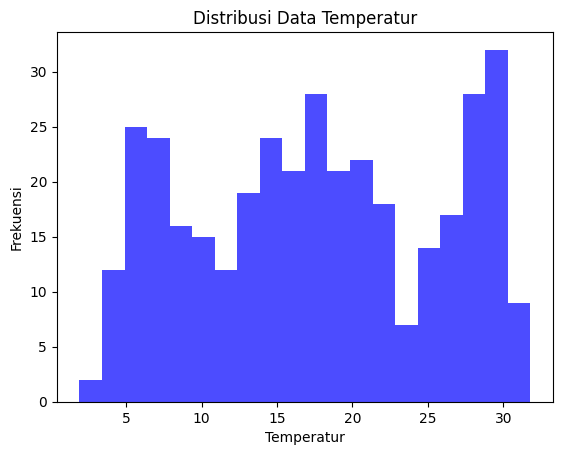

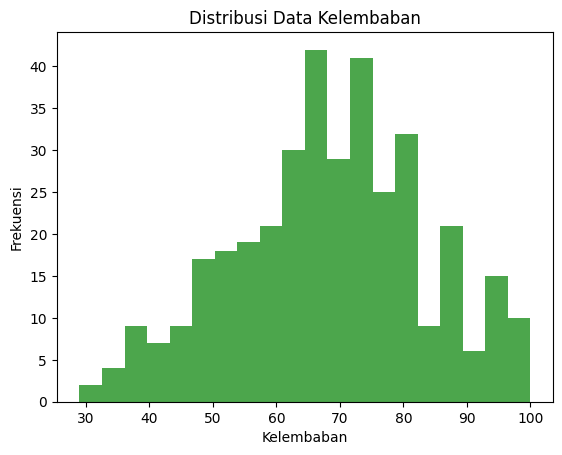

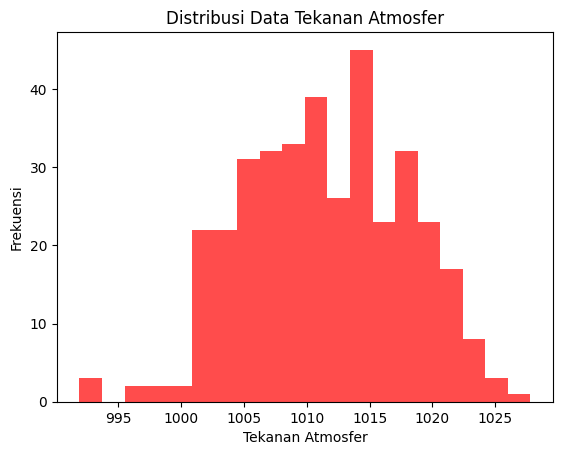

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Anggaplah df adalah DataFrame yang sudah dibaca dari dataset
# Misalnya df = pd.read_csv('path_to_your_dataset.csv')

# Menampilkan histogram untuk kolom 'temperature'
plt.hist(df['temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Distribusi Data Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

# Menampilkan histogram untuk kolom 'humidity'
plt.hist(df['humidity '], bins=20, color='green', alpha=0.7)
plt.title('Distribusi Data Kelembaban')
plt.xlabel('Kelembaban')
plt.ylabel('Frekuensi')
plt.show()

# Menampilkan histogram untuk kolom 'atmospheric pressure'
plt.hist(df['atmospheric pressure'], bins=20, color='red', alpha=0.7)
plt.title('Distribusi Data Tekanan Atmosfer')
plt.xlabel('Tekanan Atmosfer')
plt.ylabel('Frekuensi')
plt.show()


Output : Distribusi data dari setiap atribut yang kita miliki X menunjukkan nilai atribut dan Y menunjukkan frekuensi datanya

**Visualisasi Data**

Visualisasi data adalah representasi grafis dari informasi dan pola yang terkandung dalam dataset. Tujuan utama dari visualisasi data adalah membuat data lebih dapat dimengerti, memudahkan interpretasi, dan membantu dalam pengambilan keputusan. Dengan mewakili data dalam bentuk grafis, visualisasi memungkinkan orang untuk melihat hubungan, pola, dan tren secara lebih intuitif daripada sekadar memeriksa angka-angka mentah.

Prompt : berikan kode untuk  membuat histogram dari seluruh atribut

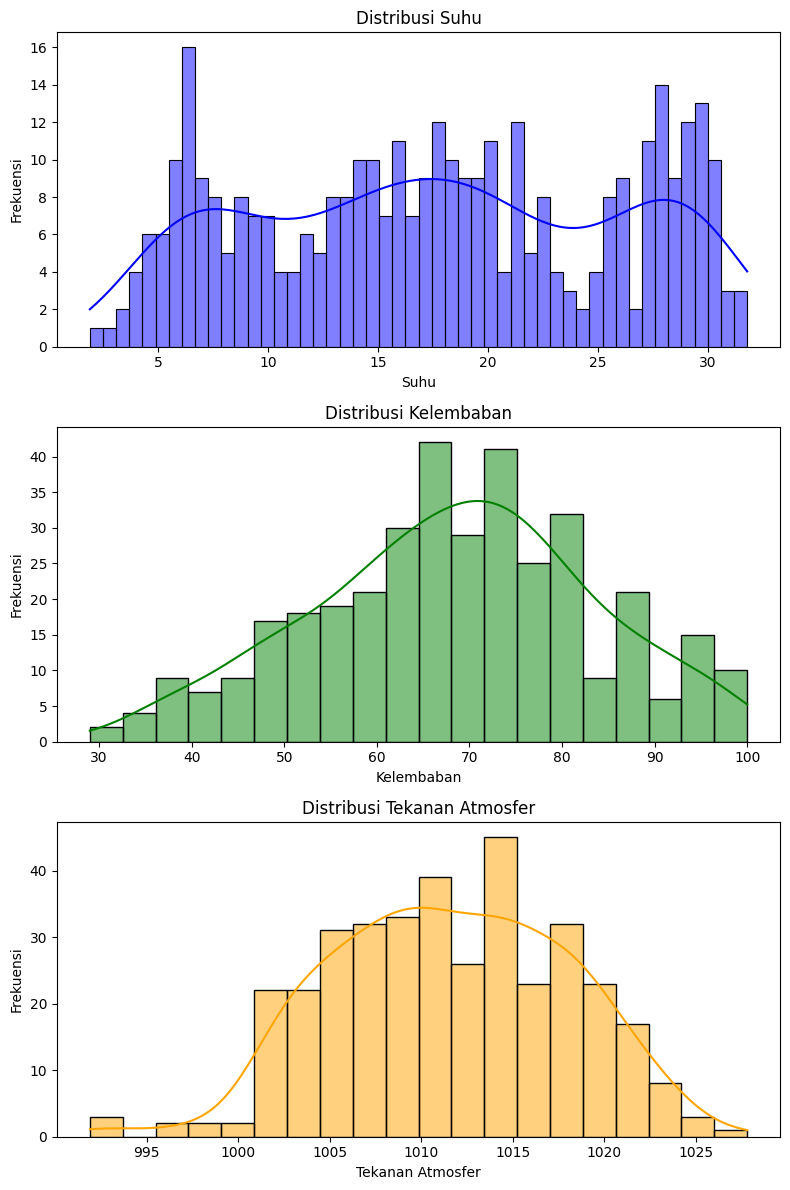

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menyiapkan subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Histogram untuk Suhu dengan lebih banyak bins
sns.histplot(df['temperature'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribusi Suhu')
axes[0].set_xlabel('Suhu')
axes[0].set_ylabel('Frekuensi')

# Histogram untuk Kelembaban
sns.histplot(df['humidity '], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title('Distribusi Kelembaban')
axes[1].set_xlabel('Kelembaban')
axes[1].set_ylabel('Frekuensi')

# Histogram untuk Tekanan Atmosfer
sns.histplot(df['atmospheric pressure'], bins=20, kde=True, color='orange', ax=axes[2])
axes[2].set_title('Distribusi Tekanan Atmosfer')
axes[2].set_xlabel('Tekanan Atmosfer')
axes[2].set_ylabel('Frekuensi')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan histogram
plt.show()


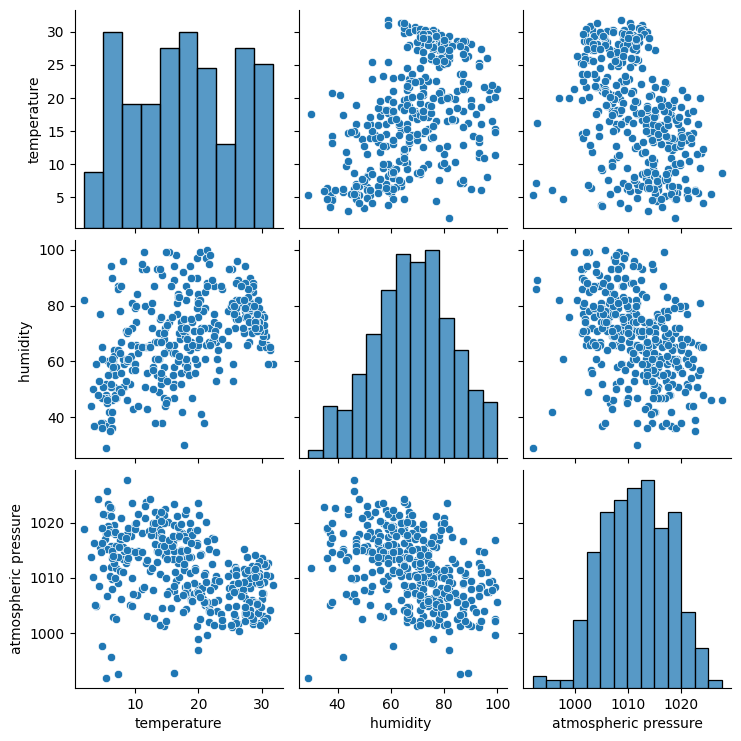

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat pair plot dari seluruh atribut
sns.pairplot(df)
plt.show()


Dalam pair plot di atas, setiap scatter plot akan menunjukkan hubungan antara dua atribut. Diagonal plot akan menunjukkan distribusi univariat dari masing-masing atribut.

Prompt : berikan kode untuk membuat heatmap dari seluruh atribut

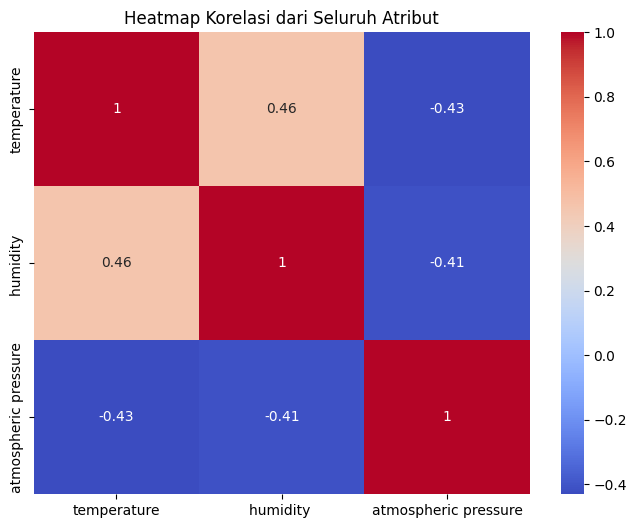

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi dari Seluruh Atribut')
plt.show()

Heatmap korelasi memberikan representasi visual tentang seberapa erat hubungan antara setiap pasangan atribut dalam dataset. Dalam heatmap korelasi, nilai korelasi diwakili oleh warna, yang memungkinkan Anda untuk dengan cepat mengidentifikasi pola dan ketergantungan antara atribut.

**Train dengan menggunakan model K-mean Clustering**

In [15]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           366 non-null    float64
 1   humidity              366 non-null    float64
 2   atmospheric pressure  366 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [16]:
# Mencetak nama seluruh kolom di DataFrame
print(df.columns)

Index(['temperature', 'humidity ', 'atmospheric pressure'], dtype='object')


prompt: buatkan kode untuk train model dengan menggunakan k-mean clustering dengan menggunakan Index(['temperature', 'humidity ', 'atmospheric pressure'], dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
   temperature   humidity  atmospheric pressure
0    23.522581  72.077419           1009.887097
1    10.809137  52.992701           1015.399270
2    18.022973  88.824324           1007.713514

Cluster Labels:
0    155
1    137
2     74
Name: cluster_labels, dtype: int64


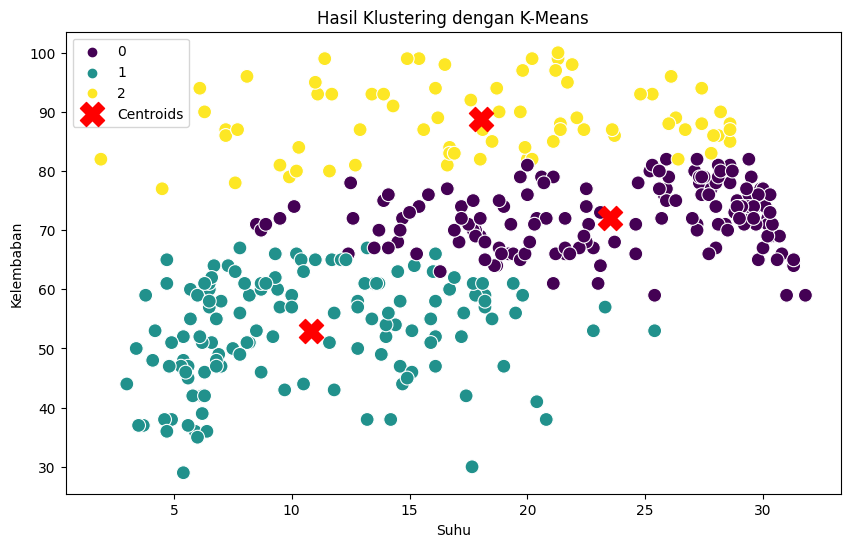

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Menghapus spasi ekstra pada nama kolom
df.columns = df.columns.str.strip()

# Mengambil atribut yang akan digunakan untuk klustering
X = df[['temperature', 'humidity', 'atmospheric pressure']]

# Menentukan jumlah cluster (n_clusters)
num_clusters = 3

# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan training model
kmeans.fit(X)

# Menambahkan kolom cluster_labels ke DataFrame
df['cluster_labels'] = kmeans.labels_

# Menampilkan nilai centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Centroids:")
print(centroids_df)

# Menampilkan hasil kluster
print("\nCluster Labels:")
print(df['cluster_labels'].value_counts())

# Visualisasi hasil kluster
plt.figure(figsize=(10, 6))

# Scatter plot dengan warna berbeda untuk setiap kluster
sns.scatterplot(data=df, x='temperature', y='humidity', hue='cluster_labels', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Hasil Klustering dengan K-Means')
plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
   temperature   humidity  atmospheric pressure
0    23.522581  72.077419           1009.887097
1    10.809137  52.992701           1015.399270
2    18.022973  88.824324           1007.713514

Cluster Labels:
0    155
1    137
2     74
Name: cluster_labels, dtype: int64


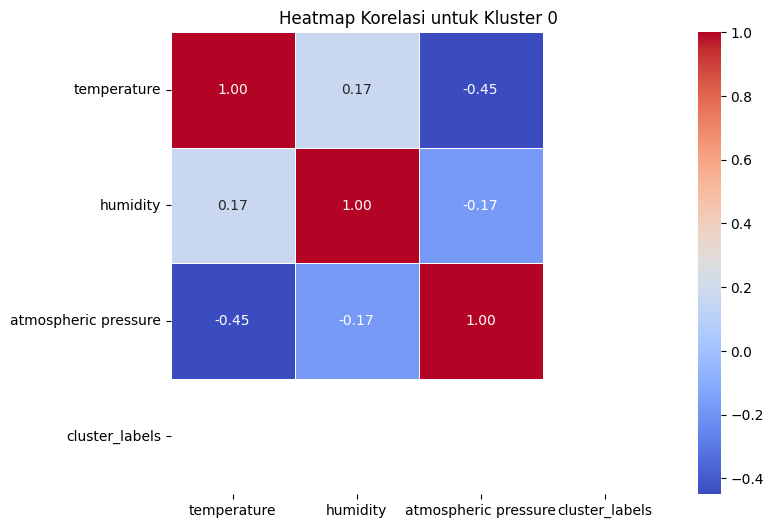

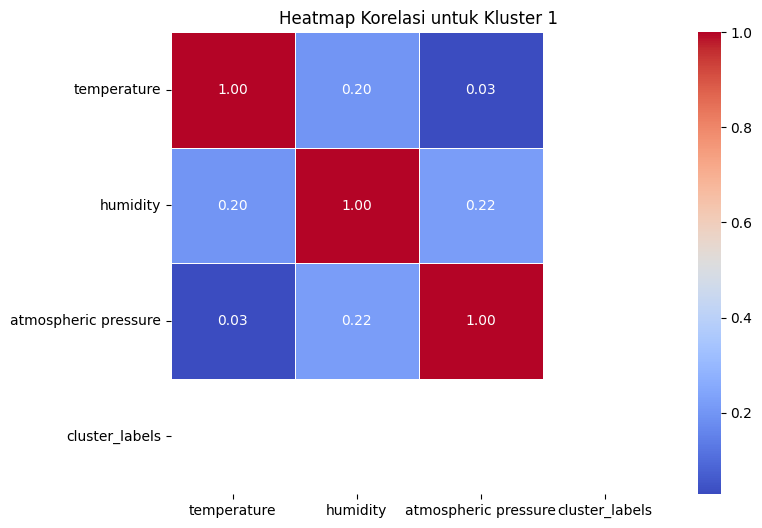

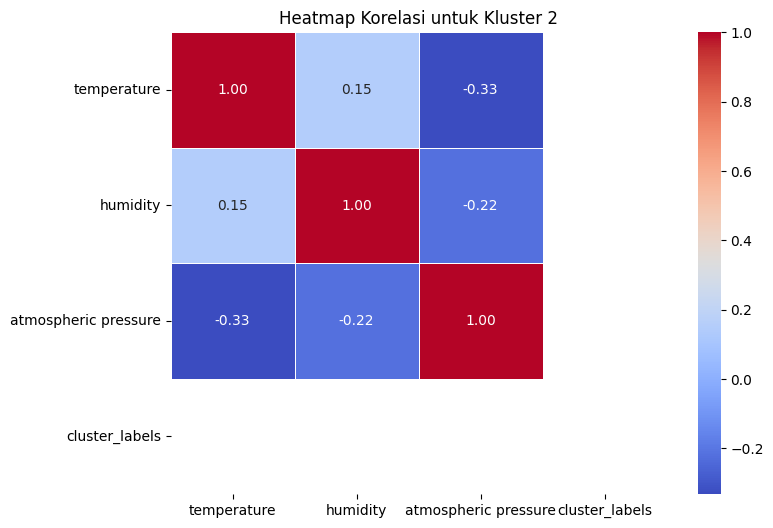

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menghapus spasi ekstra pada nama kolom
df.columns = df.columns.str.strip()

# Mengambil atribut yang akan digunakan untuk klustering
X = df[['temperature', 'humidity', 'atmospheric pressure']]

# Menentukan jumlah cluster (n_clusters)
num_clusters = 3

# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan training model
kmeans.fit(X)

# Menambahkan kolom cluster_labels ke DataFrame
df['cluster_labels'] = kmeans.labels_

# Menampilkan nilai centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Centroids:")
print(centroids_df)

# Menampilkan hasil kluster
print("\nCluster Labels:")
print(df['cluster_labels'].value_counts())

# Visualisasi korelasi untuk setiap kluster
for cluster_label in range(num_clusters):
    # Membuat DataFrame hanya dengan data pada kluster tertentu
    cluster_df = df[df['cluster_labels'] == cluster_label]

    # Menghitung matriks korelasi
    correlation_matrix = cluster_df.corr()

    # Menampilkan heatmap korelasi
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Heatmap Korelasi untuk Kluster {cluster_label}')
    plt.show()


Output :

Centroids:
Menunjukkan nilai pusat dari setiap kluster dalam ruang fitur. Pusat ini adalah representasi titik tengah kluster.

Cluster Labels:
Menunjukkan label kluster yang telah diatributkan ke setiap data. Setiap data akan terhubung dengan kluster tertentu.

Visualisasi Hasil Kluster:
Scatter plot menunjukkan bagaimana data tersebar dalam ruang fitur. Warna berbeda mewakili kluster yang berbeda, dan posisi setiap titik merepresentasikan atribut 'temperature' dan 'humidity'.

**Evaluasi K-mean clustering model dengan menggunakan metric silhouette score, Davies-Bouldin index dan Calinski Harbasz index**

prompt : buatkan kode untuk melakukan hasil evaluasi k-mean clustering

In [19]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3695387994470033


Silhouette Score:

Rentang nilai dari -1 hingga 1. Nilai yang lebih tinggi menunjukkan bahwa setiap titik data lebih baik cocok dengan klusternya sendiri dibandingkan dengan kluster tetangga. Nilai positif yang tinggi menunjukkan bahwa klustering berhasil.

In [20]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.9954081608875013


Davies-Bouldin Index:

Nilai yang lebih rendah menunjukkan klustering yang lebih baik. Indeks ini mengukur seberapa baik kluster terpisah dan seberapa seragam ukuran kluster.

In [21]:
from sklearn.metrics import calinski_harabasz_score

# Menghitung Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index}")


Calinski-Harabasz Index: 352.72493824112513


Calinski-Harabasz Index:

 Nilai yang lebih tinggi menunjukkan bahwa kluster memiliki varians yang tinggi dalam kluster sendiri dan rendah antar kluster. Skor ini mengukur seberapa baik kluster terdefinisi dengan jelas

**Input New Data**

Centroids:
   temperature  humidity  atmospheric pressure
0        26.75     58.75           1009.500000
1        20.00     45.00           1002.333333
2        29.50     67.50           1013.500000

Cluster Labels:
0    4
1    3
2    2
Name: cluster_labels, dtype: int64

Prediksi Kluster untuk Data Baru:
   temperature  humidity  atmospheric pressure  predicted_cluster
0         25.0      60.0                1010.0                  0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


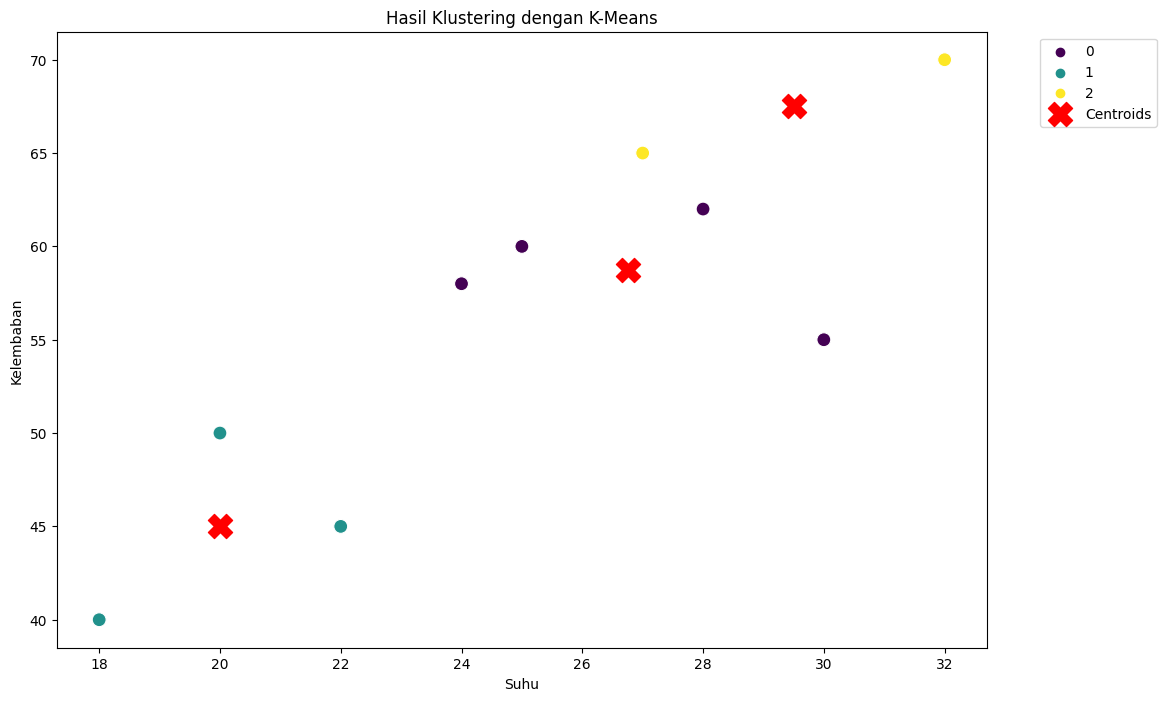

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Data sebelumnya untuk pelatihan model
data = pd.DataFrame({
    'temperature': [20.0, 25.0, 30.0, 22.0, 27.0, 32.0, 18.0, 24.0, 28.0],
    'humidity': [50.0, 60.0, 55.0, 45.0, 65.0, 70.0, 40.0, 58.0, 62.0],
    'atmospheric pressure': [1005.0, 1010.0, 1008.0, 1002.0, 1015.0, 1012.0, 1000.0, 1009.0, 1011.0]
})

# Menghapus spasi ekstra pada nama kolom
data.columns = data.columns.str.strip()

# Mengambil atribut yang akan digunakan untuk klustering
X = data[['temperature', 'humidity', 'atmospheric pressure']]

# Menentukan jumlah cluster (n_clusters)
num_clusters = 3

# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan training model
kmeans.fit(X)

# Menambahkan kolom cluster_labels ke DataFrame
data['cluster_labels'] = kmeans.labels_

# Menampilkan nilai centroids
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Centroids:")
print(centroids_df)

# Menampilkan hasil kluster
print("\nCluster Labels:")
print(data['cluster_labels'].value_counts())

# Data baru yang ingin di-cluster
new_data = pd.DataFrame({
    'temperature': [25.0],
    'humidity': [60.0],
    'atmospheric pressure': [1010.0]
})

# Menghapus spasi ekstra pada nama kolom
new_data.columns = new_data.columns.str.strip()

# Mengambil atribut yang akan digunakan untuk klustering pada data baru
X_new = new_data[['temperature', 'humidity', 'atmospheric pressure']]

# Memperoleh prediksi kluster untuk data baru
new_data['predicted_cluster'] = kmeans.predict(X_new)

# Menampilkan hasil prediksi kluster untuk data baru
print("\nPrediksi Kluster untuk Data Baru:")
print(new_data[['temperature', 'humidity', 'atmospheric pressure', 'predicted_cluster']])

# Visualisasi hasil kluster
plt.figure(figsize=(12, 8))

# Scatter plot dengan warna berbeda untuk setiap kluster
sns.scatterplot(data=data, x='temperature', y='humidity', hue='cluster_labels', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

# Menempatkan legend di luar grafik
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Hasil Klustering dengan K-Means')
plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.show()


Output : Hasil clustering hanya dari data baru yang diberikan berdasarkan data pada model k-mean clustering sebelumnya